In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf

In [187]:
df = pd.read_parquet('feature.parq')
df.head()

mid_prc  b66accf4d4  01d830fc33  ac29aa28b0  \
timestamp                                                              
2025-04-16 00:00:05  1588.010010         5.0         5.0         5.0   
2025-04-16 00:00:06  1587.824951        -5.0        -5.0        -5.0   
2025-04-16 00:00:07  1587.824951        -5.0        -5.0        -5.0   
2025-04-16 00:00:08  1587.305054        -5.0        -5.0        -5.0   
2025-04-16 00:00:09  1587.285034        -5.0        -5.0        -5.0   

                     86eecbe036  9c51f3cf1d  706dbe6d28  cb232e1c9f  \
timestamp                                                             
2025-04-16 00:00:05         5.0         5.0         5.0         5.0   
2025-04-16 00:00:06        -5.0        -5.0        -5.0        -5.0   
2025-04-16 00:00:07        -5.0        -5.0        -5.0        -5.0   
2025-04-16 00:00:08        -5.0        -5.0        -5.0        -5.0   
2025-04-16 00:00:09        -5.0        -5.0        -5.0        -5.0   

                     301f8d1b44  134e1a6937  ...  2d1cf32644  18af9014b6  \
timestamp                                    ...                           
2025-04-16 00:00:05         5.0    5.000000  ...    5.000000    5.000000   
2025-04-16 00:00:06        -5.0    0.601331  ...    0.023879   -1.795081   
2025-04-16 00:00:07        -5.0    0.322740  ...    0.766593    5.000000   
2025-04-16 00:00:08        -5.0   -5.000000  ...   -5.000000   -5.000000   
2025-04-16 00:00:09        -5.0   -5.000000  ...   -5.000000   -5.000000   

                     9b980c18d7  d762c12f50  c7c3c1666c  73762306aa  \
timestamp                                                             
2025-04-16 00:00:05    5.000000         5.0    5.000000    5.000000   
2025-04-16 00:00:06    5.000000         5.0   -0.614067   -5.000000   
2025-04-16 00:00:07    5.000000         5.0    0.142544    3.931395   
2025-04-16 00:00:08   -4.450434        -5.0   -5.000000   -5.000000   
2025-04-16 00:00:09   -4.941638        -5.0   -5.000000   -5.000000   

                     1c6e322c2d  0d19cb3fb0  486cb65b0c  c49a5f9c65  
timestamp                                                            
2025-04-16 00:00:05    5.000000         5.0    5.000000      5.0000  
2025-04-16 00:00:06    5.000000         5.0   -0.774996     -5.0000  
2025-04-16 00:00:07    5.000000         5.0   -0.024244     -3.6261  
2025-04-16 00:00:08   -4.419014        -5.0   -5.000000     -5.0000  
2025-04-16 00:00:09   -4.966719        -5.0   -5.000000     -5.0000  

[5 rows x 87 columns]

In [188]:
df.columns

Index(['mid_prc', 'b66accf4d4', '01d830fc33', 'ac29aa28b0', '86eecbe036',
       '9c51f3cf1d', '706dbe6d28', 'cb232e1c9f', '301f8d1b44', '134e1a6937',
       '5f3f783a1f', 'd182b35ca9', 'c910253362', '8572904679', '486b27acac',
       'e10ab80234', '5e7e5a691e', 'ec021e3c39', 'c12d090869', 'ac567aa14a',
       '5e95d4c57f', '84e6dad0a3', '72e0d3737a', '865224234b', '497584e7d1',
       'fe12c6cc6c', '7d08e345ba', 'e486088bae', 'e093f74611', '7a0f3d15e0',
       '7373db20a8', 'd50ec44f62', '98727525fc', '4a9f632715', 'f46c65222f',
       'ac8a9f9f8f', 'd4112c20e5', 'd5b6b02144', 'da2cdd99f0', 'f2541b5abc',
       'f98542952a', 'ffbe745f16', '3e21085969', 'a4e012f275', '5b49e63bed',
       'be3e28c4c3', 'd204751de5', 'fa27718d2f', '066b586798', '299afc361e',
       'f9729a88bb', '470d88c5b1', 'd2edb86598', '71cf837e9a', '203633358c',
       'd0cfd8e5d0', 'e2ab68e2c7', '81bb633696', '2ebb6e47c7', '1b6ac90abc',
       'dee93af023', '7e149245ee', 'df3261ae5e', 'a94fc5357b', '21a69fbc66',
  

In [189]:
df.shape

(604378, 87)

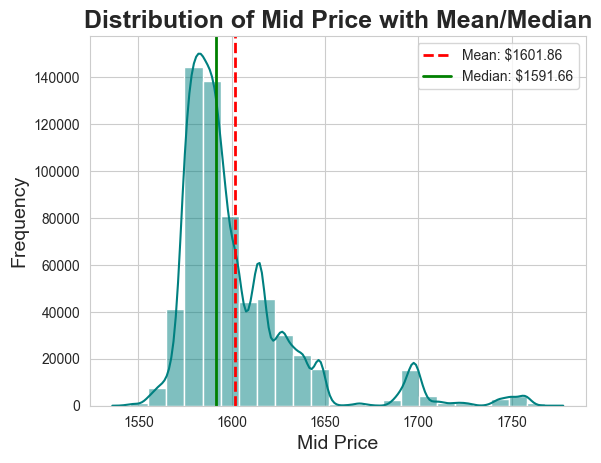

In [190]:
# Create the plot
ax = sns.histplot(data=df, x='mid_prc', bins=25, kde=True, color='teal')

# Add a vertical line for the mean and median to see skewness
mean_price = df['mid_prc'].mean()
median_price = df['mid_prc'].median()

ax.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:.2f}')
ax.axvline(median_price, color='green', linestyle='-', linewidth=2, label=f'Median: ${median_price:.2f}')

# --- Enhance the plot with titles and labels ---
ax.set_title('Distribution of Mid Price with Mean/Median', fontsize=18, weight='bold')
ax.set_xlabel('Mid Price', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.legend()

# --- Display the plot ---
plt.show()


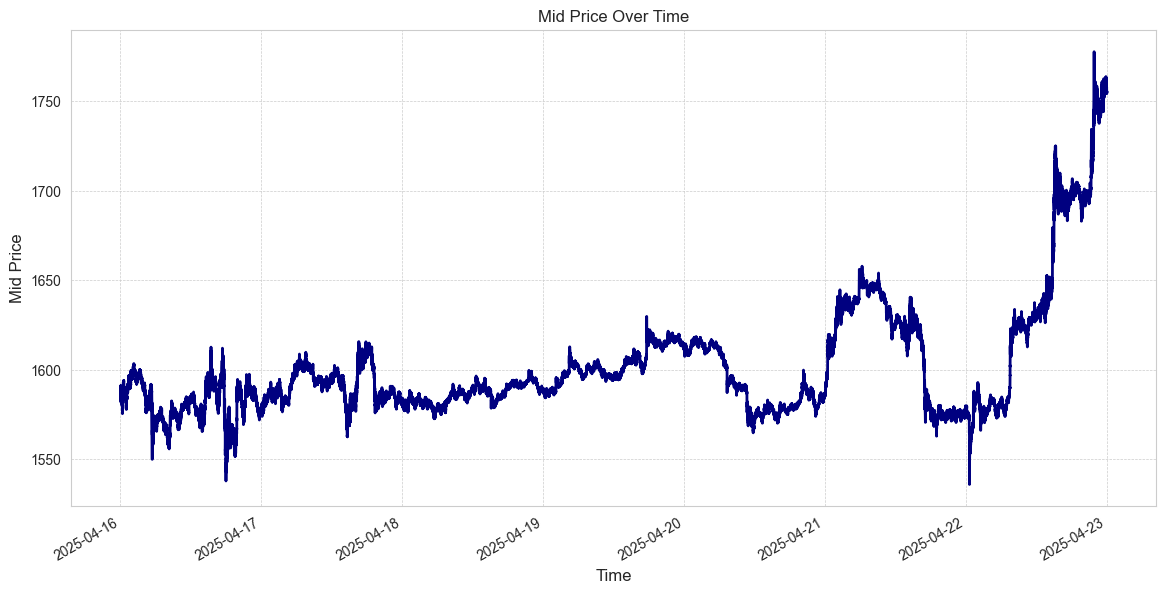

In [191]:
# --- Set a professional plot style ---
sns.set_style("whitegrid")

# --- Create the plot using the pandas .plot() method ---
ax = df['mid_prc'].plot(
    figsize=(14, 7),
    title='Mid Price Over Time',
    color='navy',
    linewidth=2
)

# --- Enhance the plot with clear labels ---
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Mid Price', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# --- Display the plot ---
plt.show()


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604378 entries, 2025-04-16 00:00:05 to 2025-04-22 23:59:59
Data columns (total 87 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   mid_prc     604378 non-null  float32
 1   b66accf4d4  604378 non-null  float32
 2   01d830fc33  604378 non-null  float32
 3   ac29aa28b0  604378 non-null  float32
 4   86eecbe036  604378 non-null  float32
 5   9c51f3cf1d  604378 non-null  float32
 6   706dbe6d28  604378 non-null  float32
 7   cb232e1c9f  604378 non-null  float32
 8   301f8d1b44  604378 non-null  float32
 9   134e1a6937  604378 non-null  float32
 10  5f3f783a1f  604378 non-null  float32
 11  d182b35ca9  604378 non-null  float32
 12  c910253362  604378 non-null  float32
 13  8572904679  604378 non-null  float32
 14  486b27acac  604378 non-null  float32
 15  e10ab80234  604378 non-null  float32
 16  5e7e5a691e  604378 non-null  float32
 17  ec021e3c39  604378 non-null  float32
 18  c12d090869

In [193]:
df_describe = df.describe(include='float32')

with pd.option_context('display.max_columns', None):
    print(df_describe)

             mid_prc     b66accf4d4     01d830fc33     ac29aa28b0  \
count  604378.000000  604378.000000  604378.000000  604378.000000   
mean     1601.856689      -0.001573       0.000471       0.000961   
std        33.063606       1.002640       1.000666       0.999296   
min      1536.010010      -5.000000      -5.000000      -5.000000   
25%      1581.724976      -0.673479      -0.634930      -0.610623   
50%      1591.655029      -0.007083      -0.004322       0.000993   
75%      1612.604980       0.664406       0.633471       0.612619   
max      1777.680054       5.000000       5.000000       5.000000   

          86eecbe036     9c51f3cf1d     706dbe6d28     cb232e1c9f  \
count  604378.000000  604378.000000  604378.000000  604378.000000   
mean        0.000961      -0.003787      -0.004580      -0.002970   
std         0.999296       1.005991       1.007335       1.004184   
min        -5.000000      -5.000000      -5.000000      -5.000000   
25%        -0.610618      -0.6613

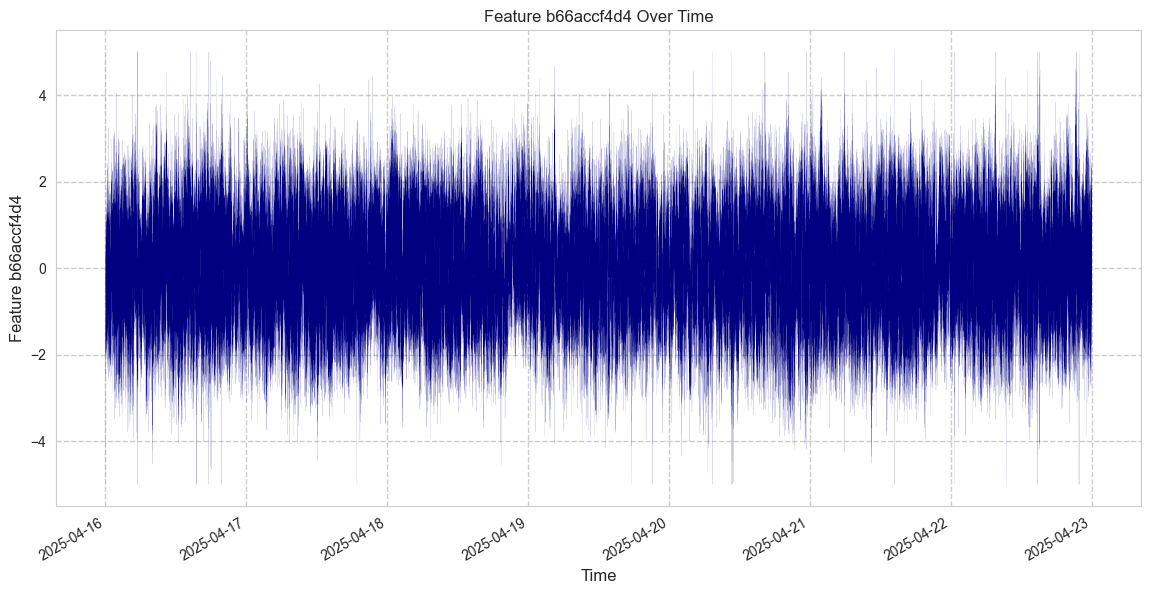

In [194]:
df['b66accf4d4'].plot(figsize=(14, 7), title='Feature b66accf4d4 Over Time', color='navy', linewidth=0.05)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Feature b66accf4d4', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=1)
plt.show()

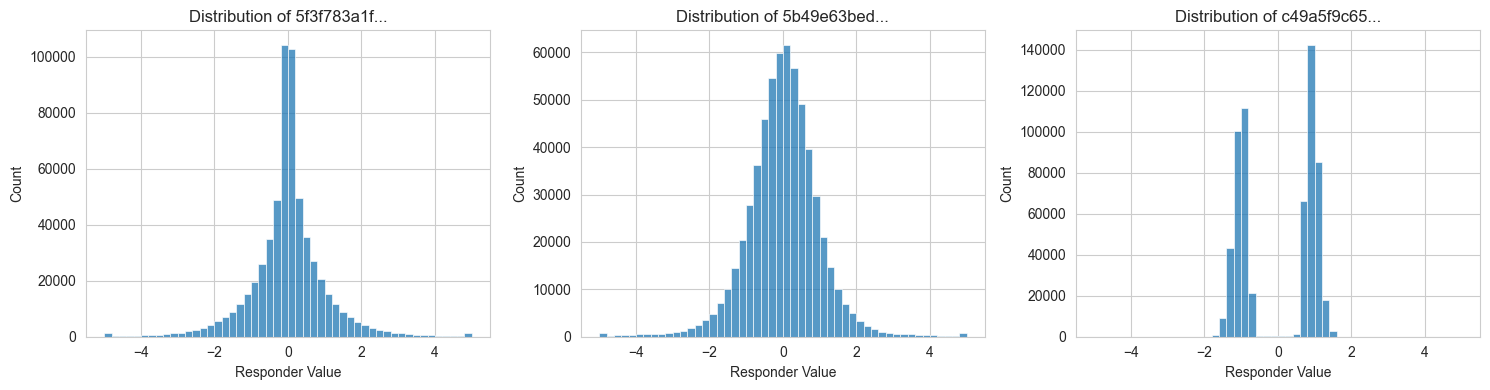

In [195]:
df_copy = df.copy()
responder_cols = df_copy.columns.drop('mid_prc')

# --- Distribution Plots for Sample Responders ---
# We'll use histograms, not count plots
sample_responders_to_plot = [responder_cols[9], responder_cols[43], responder_cols[85]]

plt.figure(figsize=(15, 4))
for i, col_name in enumerate(sample_responders_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col_name], bins=50)
    plt.title(f'Distribution of {col_name[:10]}...')
    plt.xlabel('Responder Value')

plt.tight_layout()
plt.show()

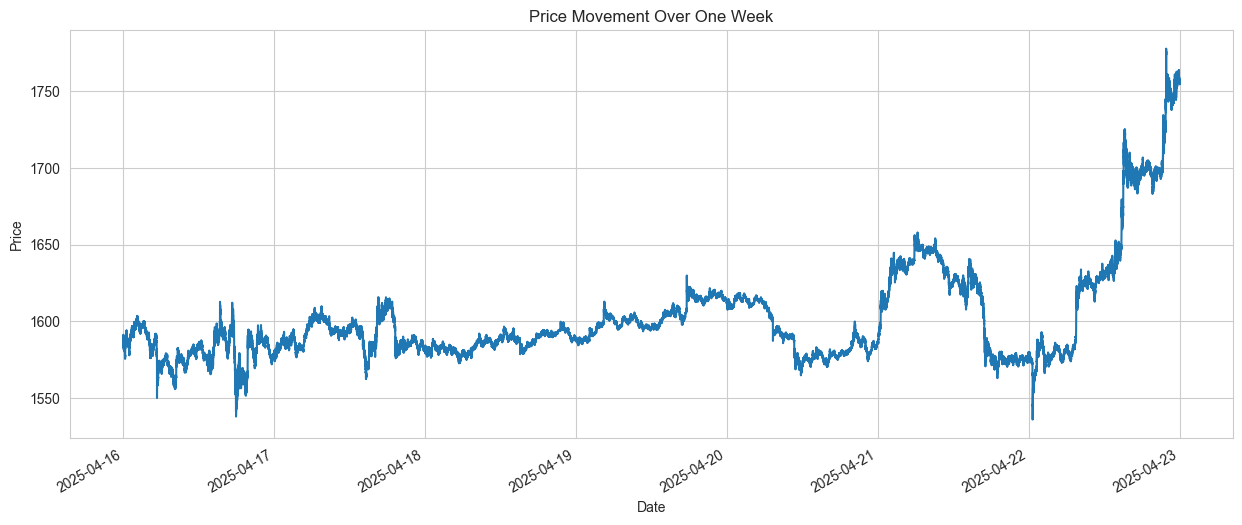

In [196]:
# Plot the price over the entire duration
df_copy['mid_prc'].plot(figsize=(15, 6), title='Price Movement Over One Week')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

/var/folders/sr/p42wz5n11rzcm2dvgg2x75l00000gn/T/ipykernel_64591/3416073384.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_copy['mid_prc'].resample('10T').mean()


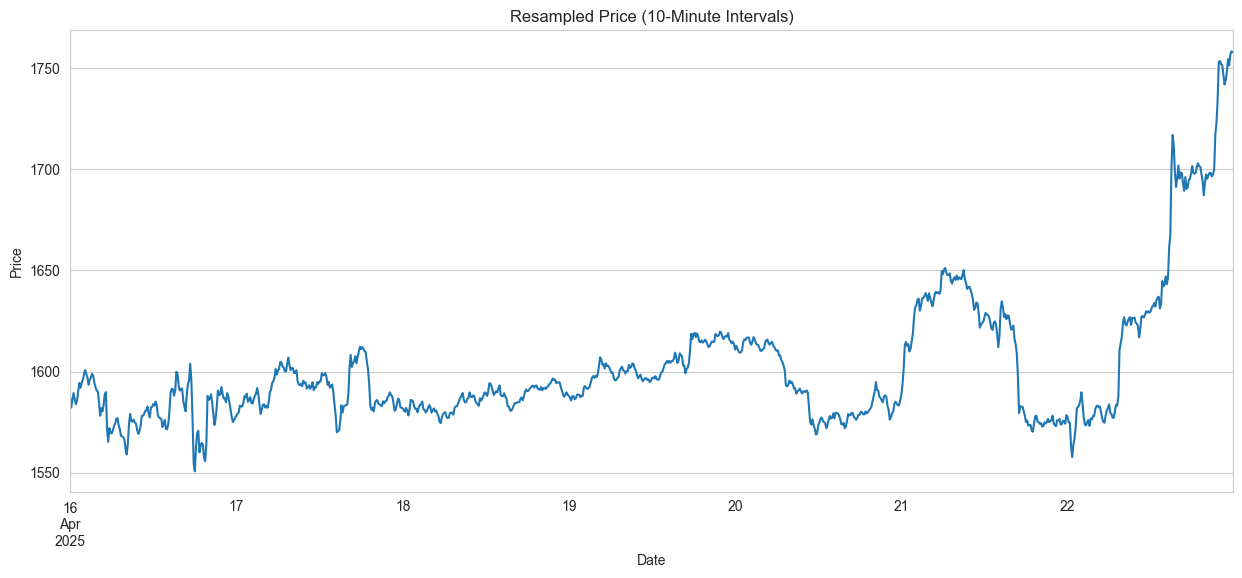

In [197]:
# Resample to 10-minute intervals, taking the mean price for each interval
df_resampled = df_copy['mid_prc'].resample('10T').mean()

# Plot the resampled data
df_resampled.plot(figsize=(15, 6), title='Resampled Price (10-Minute Intervals)')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

/var/folders/sr/p42wz5n11rzcm2dvgg2x75l00000gn/T/ipykernel_64591/4233242731.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute = df_copy['mid_prc'].resample('1T').mean().ffill() # Fill any gaps


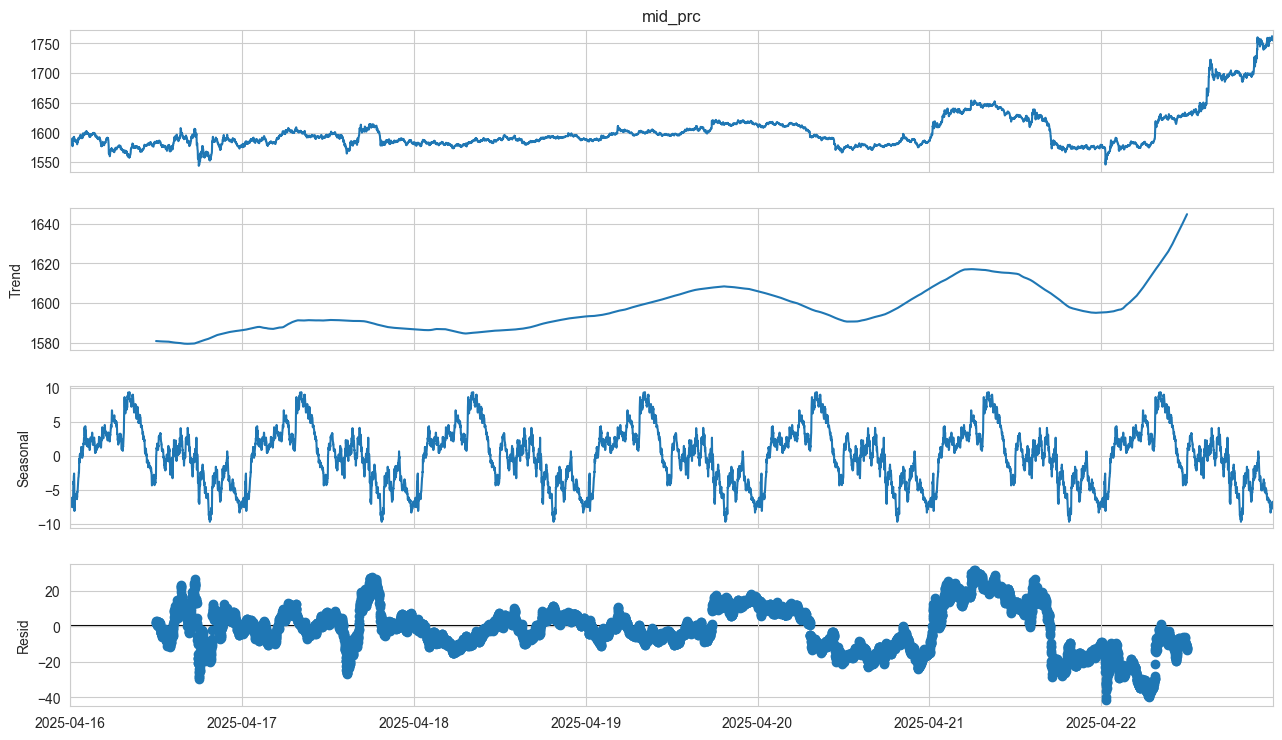

In [198]:
# Decomposition works best on a consistent frequency, so we'll use our resampled data.
# Daily seasonality on minute data means a period of 24 hours * 60 minutes = 1440
df_minute = df_copy['mid_prc'].resample('1T').mean().ffill() # Fill any gaps
result = seasonal_decompose(df_minute, model='additive', period=1440)

# Plot the decomposed components
fig = result.plot()
fig.set_size_inches(14, 8)
plt.show()

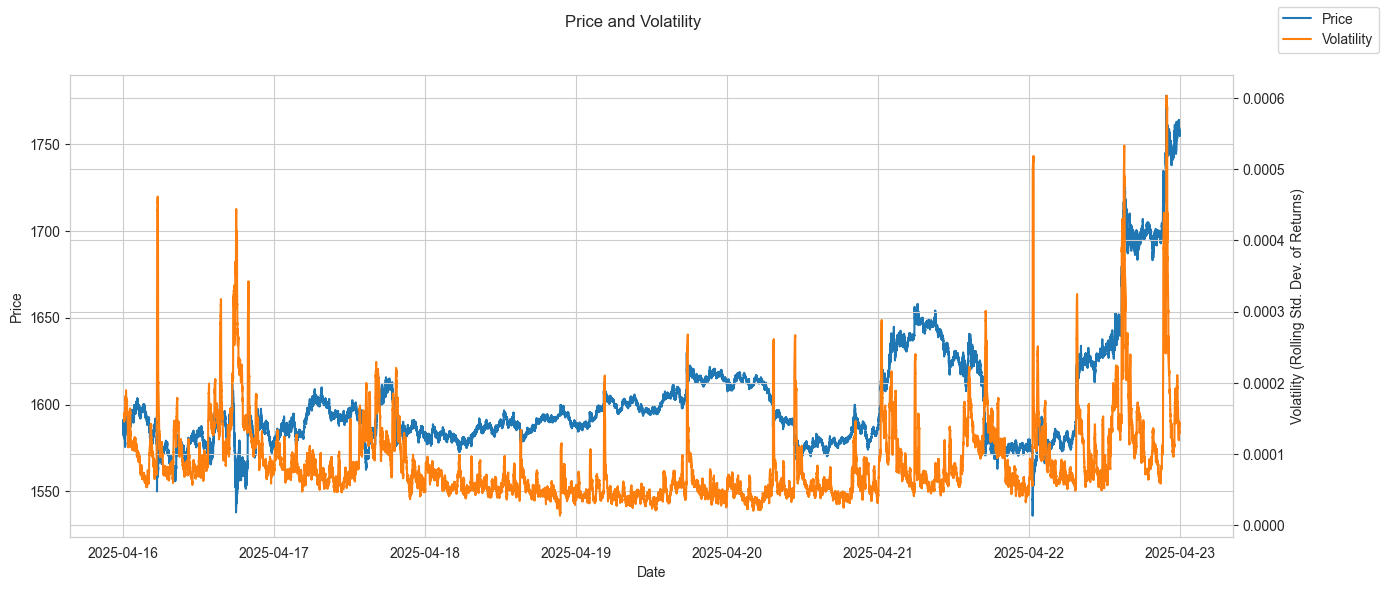

In [199]:
# Calculate the percentage change in price (returns)
df_copy['returns'] = df_copy['mid_prc'].pct_change()

# Calculate the rolling standard deviation of returns (a measure of volatility)
# We'll use a 10-minute window (10 * 60 seconds)
df_copy['volatility'] = df_copy['returns'].rolling(window=10*60).std()

# Plot price and its volatility on the same chart
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot price on the primary y-axis
ax1.plot(df_copy['mid_prc'], color='C0', label='Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

# Create a secondary y-axis for volatility
ax2 = ax1.twinx()
ax2.plot(df_copy['volatility'], color='C1', label='Volatility')
ax2.set_ylabel('Volatility (Rolling Std. Dev. of Returns)')

fig.suptitle('Price and Volatility')
fig.legend()
plt.show()

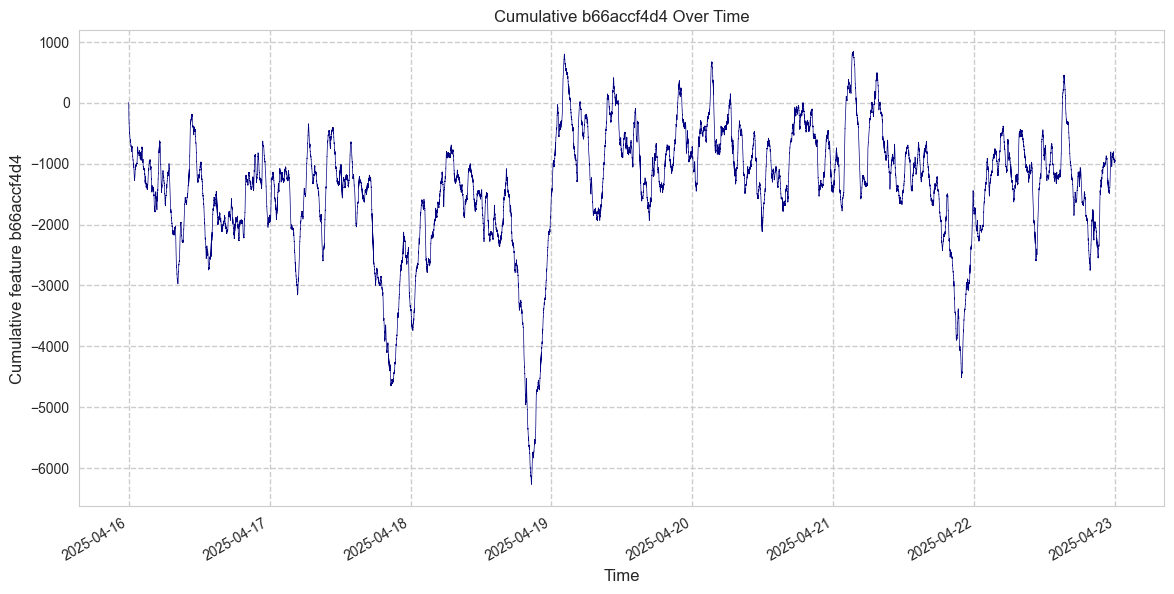

In [200]:
df['b66accf4d4'].cumsum().plot(figsize=(14, 7), title='Cumulative b66accf4d4 Over Time', color='navy', linewidth=0.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Cumulative feature b66accf4d4', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=1)
plt.show()

In [201]:
cum_feature = df['b66accf4d4'].cumsum()
correlation = cum_feature.corr(df['mid_prc'])
print(f"Correlation between cumulative b66accf4d4 and mid_prc: {correlation:.4f}")

Correlation between cumulative b66accf4d4 and mid_prc: 0.2229


In [202]:
features_list = {'b66accf4d4', '01d830fc33','ac29aa28b0', '86eecbe036',
       '9c51f3cf1d', '706dbe6d28', 'cb232e1c9f', '301f8d1b44', '134e1a6937',
       '5f3f783a1f', 'd182b35ca9', 'c910253362', '8572904679', '486b27acac',
       'e10ab80234', '5e7e5a691e', 'ec021e3c39', 'c12d090869', 'ac567aa14a',
       '5e95d4c57f', '84e6dad0a3', '72e0d3737a', '865224234b', '497584e7d1',
       'fe12c6cc6c', '7d08e345ba', 'e486088bae', 'e093f74611', '7a0f3d15e0',
       '7373db20a8', 'd50ec44f62', '98727525fc', '4a9f632715', 'f46c65222f',
       'ac8a9f9f8f', 'd4112c20e5', 'd5b6b02144', 'da2cdd99f0', 'f2541b5abc',
       'f98542952a', 'ffbe745f16', '3e21085969', 'a4e012f275', '5b49e63bed',
       'be3e28c4c3', 'd204751de5', 'fa27718d2f', '066b586798', '299afc361e',
       'f9729a88bb', '470d88c5b1', 'd2edb86598', '71cf837e9a', '203633358c',
       'd0cfd8e5d0', 'e2ab68e2c7', '81bb633696', '2ebb6e47c7', '1b6ac90abc',
       'dee93af023', '7e149245ee', 'df3261ae5e', 'a94fc5357b', '21a69fbc66',
       'c5001fe3b3', '1aa3d78298', 'c2675078fe', 'e2624a64cd', '5d422876c4',
       'fd5d8e0768', '1a7b35154d', 'e379e765f6', '862b567dd6', '6d0ae28237',
       'a2dbde07a4', '5f4f6a981b', '2d1cf32644', '18af9014b6', '9b980c18d7',
       'd762c12f50', 'c7c3c1666c', '73762306aa', '1c6e322c2d', '0d19cb3fb0',
       '486cb65b0c', 'c49a5f9c65'}

In [203]:
correlations = {}

for feature in features_list:
    cum_feature = df[feature].cumsum()
    corr = cum_feature.corr(df['mid_prc'])
    correlations[feature] = corr

# Display all correlations
for feature, corr in correlations.items():
    print(f"Correlation between cumulative {feature} and mid_prc: {corr:.4f}")

Correlation between cumulative 9c51f3cf1d and mid_prc: -0.2809
Correlation between cumulative df3261ae5e and mid_prc: 0.1373
Correlation between cumulative 1aa3d78298 and mid_prc: 0.0581
Correlation between cumulative ac567aa14a and mid_prc: -0.3813
Correlation between cumulative da2cdd99f0 and mid_prc: -0.4470
Correlation between cumulative 301f8d1b44 and mid_prc: -0.0645
Correlation between cumulative a94fc5357b and mid_prc: -0.5384
Correlation between cumulative 18af9014b6 and mid_prc: -0.4759
Correlation between cumulative 706dbe6d28 and mid_prc: -0.2132
Correlation between cumulative 7a0f3d15e0 and mid_prc: 0.3506
Correlation between cumulative c2675078fe and mid_prc: 0.3639
Correlation between cumulative e2624a64cd and mid_prc: -0.2683
Correlation between cumulative ac8a9f9f8f and mid_prc: -0.1779
Correlation between cumulative c7c3c1666c and mid_prc: -0.0832
Correlation between cumulative 5d422876c4 and mid_prc: 0.3700
Correlation between cumulative 2d1cf32644 and mid_prc: 0.154

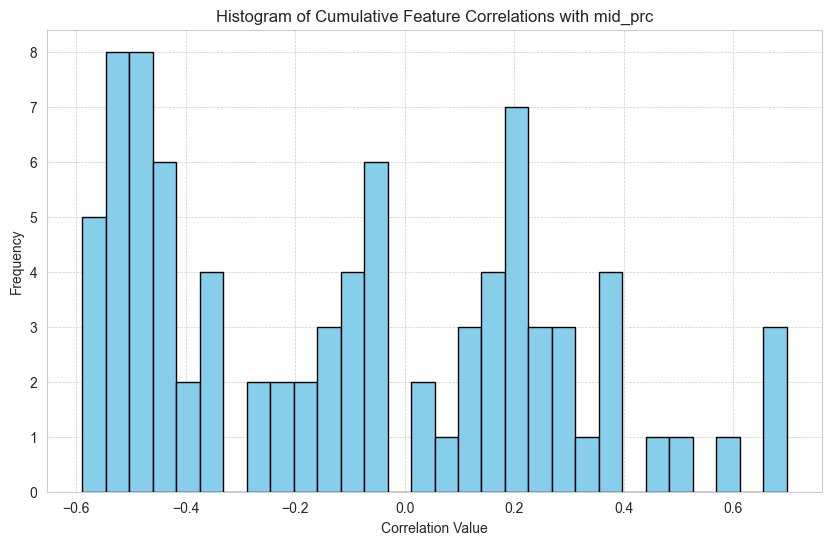

In [204]:
# Plot histogram of correlation values
plt.figure(figsize=(10, 6))
plt.hist(list(correlations.values()), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Cumulative Feature Correlations with mid_prc')
plt.xlabel('Correlation Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', linewidth=0.5)

In [205]:
threshold = 0.65
high_corr_features = [feature for feature, corr in correlations.items() if abs(corr) > threshold]
print(f"Features with correlation > {threshold}:")
for feature in high_corr_features:
    print(feature)


Features with correlation > 0.65:
486b27acac
c910253362
8572904679


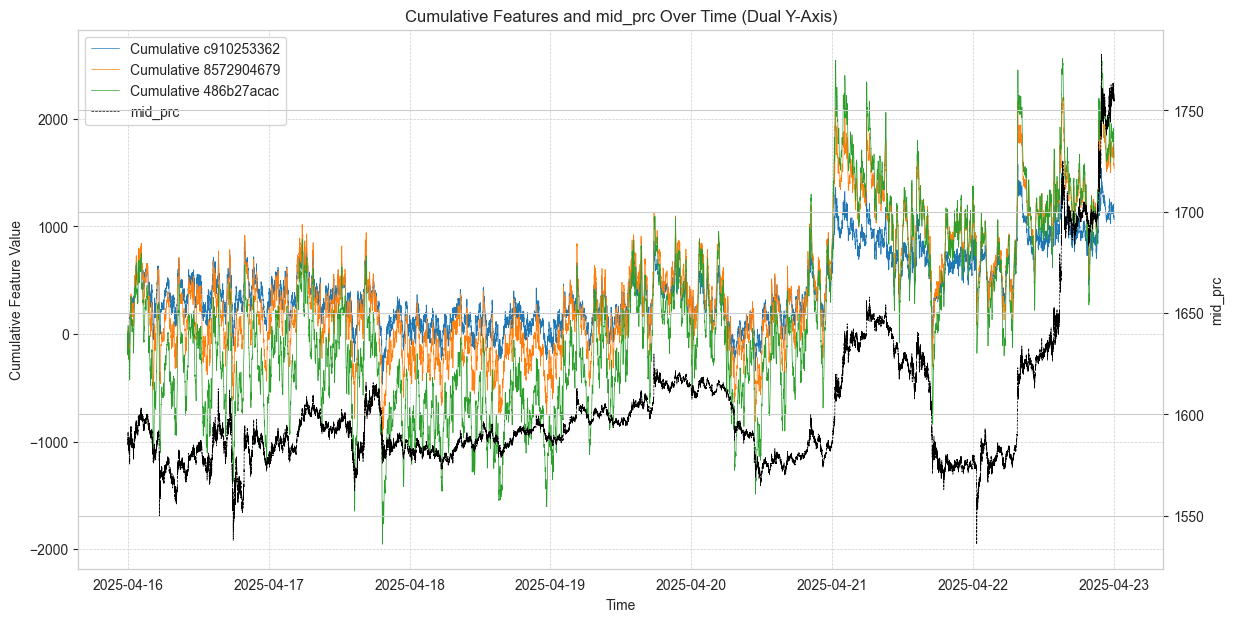

In [206]:
flist = ['c910253362', '8572904679', '486b27acac']  # Example, replace with your desired features

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot cumulative features on left y-axis
for feature in flist:
    ax1.plot(df[feature].cumsum(), label=f'Cumulative {feature}', linewidth=0.5)
ax1.set_xlabel('Time')
ax1.set_ylabel('Cumulative Feature Value')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Create a second y-axis for mid_prc
ax2 = ax1.twinx()
ax2.plot(df['mid_prc'], label='mid_prc', color='black', linewidth=0.5, linestyle='--')
ax2.set_ylabel('mid_prc')

# Legends for both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Cumulative Features and mid_prc Over Time (Dual Y-Axis)')
plt.show()

In [207]:
# Define a function to compute risk-adjusted return for given thresholds
def evaluate_thresholds(df_sim, horizon, up_th, down_th):
    df_sim['future_change'] = df_sim['mid_prc'].shift(-horizon) - df_sim['mid_prc']
    df_sim['signal'] = df_sim['future_change'].apply(
        lambda x: 1 if x > up_th else (-1 if x < down_th else 0)
    )
    # Simulate returns: assume you buy/sell at signal, hold for 'horizon' seconds
    df_sim['strategy_return'] = df_sim['signal'] * df_sim['future_change']
    mean_ret = df_sim['strategy_return'].mean()
    std_ret = df_sim['strategy_return'].std()
    sharpe = mean_ret / std_ret if std_ret != 0 else 0
    signal_hits = (df_sim['signal'] != 0).sum()
    return sharpe, mean_ret, std_ret, signal_hits

# Grid search for best thresholds (horizon fixed at 5)
best_sharpe = -np.inf
best_up, best_down = None, None
best_hits = None
# horizon = 5
df_sim = df.copy()

for horizon in np.arange(49000, 50001, 10000):  # Test horizons from 150 to 650 seconds
    for up_th in np.arange(0.005, 0.05, 0.005):
        for down_th in np.arange(-0.05, -0.005, 0.005):
            sharpe, mean_ret, std_ret, signal_hits = evaluate_thresholds(df_sim, horizon=horizon, up_th=up_th, down_th=down_th)
            if sharpe > best_sharpe:
                best_sharpe = sharpe
                best_up, best_down = up_th, down_th
                best_hits = signal_hits

print(f"Best thresholds: up={best_up}, down={best_down}, horizon={horizon}, Sharpe={best_sharpe:.2f}, Signal hits={best_hits}")

Best thresholds: up=0.005, down=-0.010000000000000023, horizon=49000, Sharpe=0.97, Signal hits=555263


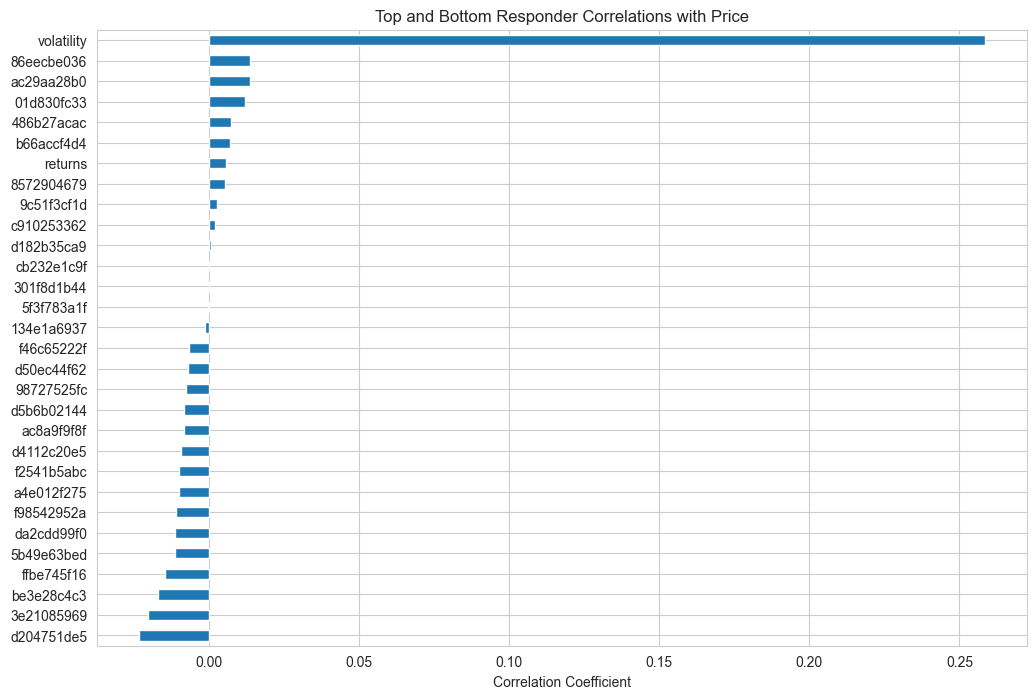

In [208]:
# Calculate the correlation of every column with 'mid_prc'
correlations = df_copy.corr()['mid_prc'].drop('mid_prc') # Drop correlation with itself

# Sort the correlations to see the strongest positive and negative ones
sorted_correlations = correlations.sort_values()

# Plot the top 15 positive and top 15 negative correlations
plt.figure(figsize=(12, 8))
# Slicing the sorted Series to get the 15 smallest and 15 largest values
top_and_bottom = pd.concat([sorted_correlations.head(15), sorted_correlations.tail(15)])
top_and_bottom.plot(kind='barh')
plt.title('Top and Bottom Responder Correlations with Price')
plt.xlabel('Correlation Coefficient')
plt.show()

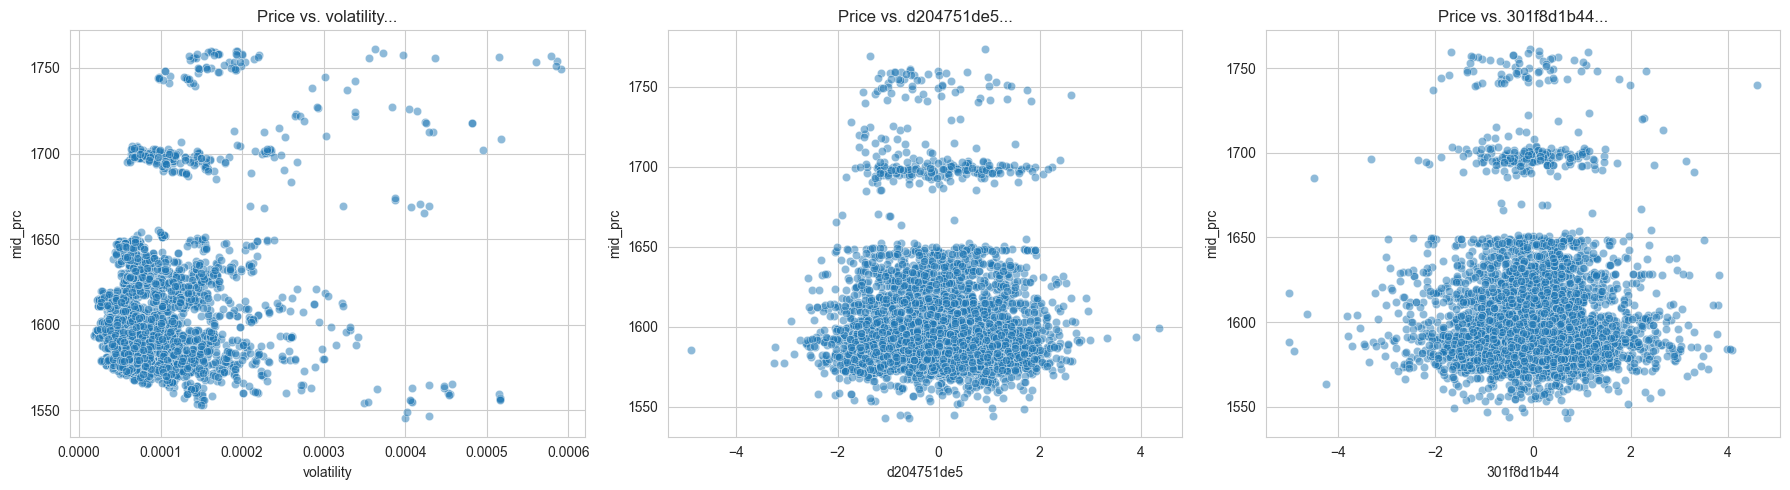

In [209]:
# Get the names of the most positive, most negative, and least correlated responders
most_positive_responder = sorted_correlations.idxmax()
most_negative_responder = sorted_correlations.idxmin()
least_correlated_responder = (correlations - 0).abs().idxmin()

responders_to_plot = [most_positive_responder, most_negative_responder, least_correlated_responder]

# Create scatter plots
plt.figure(figsize=(18, 5))
for i, responder in enumerate(responders_to_plot, 1):
    plt.subplot(1, 3, i)
    # Using a sample to avoid overplotting, and alpha for transparency
    sns.scatterplot(data=df_copy.sample(5000), x=responder, y='mid_prc', alpha=0.5)
    plt.title(f'Price vs. {responder[:10]}...')

plt.tight_layout()
plt.show()

In [210]:
# Create a new column for the price 10 seconds in the future
df_copy['mid_prc_future_10s'] = df_copy['mid_prc'].shift(-10)

# Calculate the new correlations with the future price
future_correlations = df_copy.corr()['mid_prc_future_10s'].drop(['mid_prc', 'mid_prc_future_10s'])

# Compare original correlation vs. future correlation for a strong responder
print(f"Correlation of {most_positive_responder[:10]} with current price: {correlations[most_positive_responder]:.4f}")
print(f"Correlation of {most_positive_responder[:10]} with price in 10s:   {future_correlations[most_positive_responder]:.4f}")

Correlation of volatility with current price: 0.2584
Correlation of volatility with price in 10s:   0.2584


In [211]:
df_copy = df.copy()
responder_cols = df_copy.columns.drop('mid_prc')

# First, calculate the price returns (percentage change)
df_copy['price_returns'] = df_copy['mid_prc'].pct_change()
# Now, correlate the ORIGINAL (non-cumulative) responders with these returns
# .corrwith() is a convenient way to do this for many columns at once
return_correlations = df_copy[responder_cols].corrwith(df_copy['price_returns'])

# Display the most significant correlations
print(return_correlations.sort_values(ascending=False))

134e1a6937    0.709167
ec021e3c39    0.664158
c12d090869    0.637081
5d422876c4    0.591705
5f3f783a1f    0.591241
                ...   
1aa3d78298    0.099909
c5001fe3b3    0.099650
01d830fc33    0.079906
ac29aa28b0    0.033491
86eecbe036    0.033488
Length: 86, dtype: float64


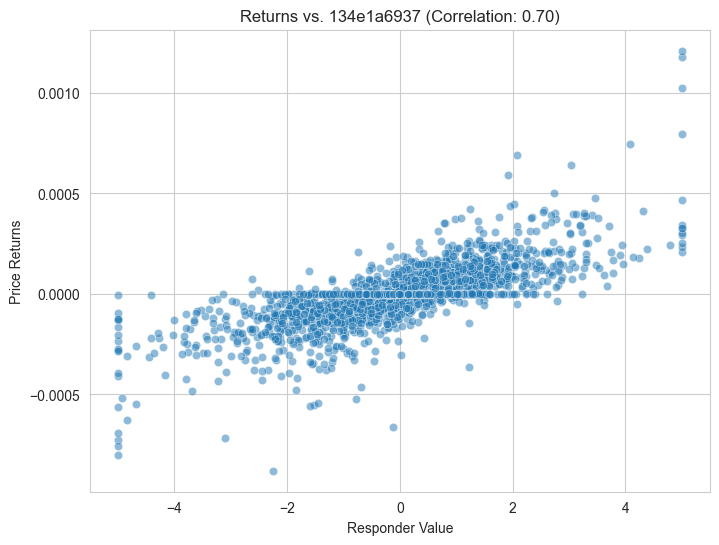

In [212]:
# Replace 'responder_name' with the actual column name of your best responder
best_responder = '134e1a6937' # The column name with the 0.7 correlation

plt.figure(figsize=(8, 6))
# Use a sample for performance and clarity
sns.scatterplot(data=df_copy.sample(5000), x=best_responder, y='price_returns', alpha=0.5)
plt.title(f'Returns vs. {best_responder[:10]} (Correlation: {0.7:.2f})')
plt.xlabel('Responder Value')
plt.ylabel('Price Returns')
plt.grid(True)
plt.show()

In [213]:
# Split the data roughly in half
first_half = df_copy.loc[:'2025-04-19']
second_half = df_copy.loc['2025-04-20':]

corr_first_half = first_half[best_responder].corr(first_half['price_returns'])
corr_second_half = second_half[best_responder].corr(second_half['price_returns'])

print(f"Correlation in first half: {corr_first_half:.4f}")
print(f"Correlation in second half: {corr_second_half:.4f}")

Correlation in first half: 0.7264
Correlation in second half: 0.7022


In [214]:
# --- Data Preparation ---
feature_name = '134e1a6937'
df_model = df_copy[[feature_name, 'price_returns']].dropna().copy()

# --- 1. Split the Data ---
# For time-series, we split chronologically, not randomly.
split_point = int(len(df_model) * 0.7)
train_df = df_model.iloc[:split_point].copy()
test_df = df_model.iloc[split_point:].copy()

print(f"Training data from {train_df.index.min()} to {train_df.index.max()}")
print(f"Testing data from {test_df.index.min()} to {test_df.index.max()}\n")

Training data from 2025-04-16 00:00:06 to 2025-04-20 21:37:11
Testing data from 2025-04-20 21:37:12 to 2025-04-22 23:59:59



In [215]:
# --- Preparation ---
# Make sure to replace these with your actual values
feature_name = '134e1a6937' 
TRANSACTION_COST_PCT = 0.0002 # 0.05% per transaction

# ==============================================================================
# STEP 1: FIND OPTIMAL THRESHOLD ON TRAINING DATA
# ==============================================================================

# Define the range of thresholds to test
candidate_thresholds = np.arange(0.5, 4.0, 0.1) 
train_results = []

# Loop through each candidate threshold
for threshold in candidate_thresholds:
    # Create market states for the current threshold
    conditions = [
        train_df[feature_name] > threshold,
        train_df[feature_name] < -threshold
    ]
    choices = ['bullish', 'bearish']
    train_df['market_state'] = np.select(conditions, choices, default='choppy')
    
    # Isolate returns for bullish and bearish signals
    bull_returns = train_df[train_df['market_state'] == 'bullish']['price_returns']
    bear_returns = train_df[train_df['market_state'] == 'bearish']['price_returns']
    
    # Ensure there are enough signals to be statistically valid
    if len(bull_returns) < 50 or len(bear_returns) < 50:
        continue
        
    # Calculate the performance score (simplified Sharpe Ratio)
    bull_sharpe = bull_returns.mean() / bull_returns.std()
    bear_sharpe = abs(bear_returns.mean() / bear_returns.std())
    score = bull_sharpe + bear_sharpe
    
    train_results.append({'threshold': threshold, 'train_score': score})

# Find the best threshold from the training phase
if not train_results:
    raise ValueError("Optimization failed. No thresholds generated enough signals in the training set.")

train_results_df = pd.DataFrame(train_results)
best_threshold_row = train_results_df.loc[train_results_df['train_score'].idxmax()]
best_threshold = best_threshold_row['threshold']

print("--- Step 1: Optimization Complete ---")
print(f"Optimal Threshold Found on Training Data: {best_threshold:.2f}")
print(f"Best In-Sample (Training) Score: {best_threshold_row['train_score']:.4f}\n")


# ==============================================================================
# STEP 2: EVALUATE THE BEST THRESHOLD ON THE TEST DATA
# ==============================================================================

# Apply the single best threshold to the test set
test_conditions = [
    test_df[feature_name] > 3.7,
    test_df[feature_name] < -3.7
]
test_choices = ['bullish', 'bearish']
test_df['market_state'] = np.select(test_conditions, test_choices, default='choppy')

# Calculate net returns on the test set, including transaction costs
test_df['signal'] = test_df['market_state'].map({'bullish': 1, 'choppy': 0, 'bearish': -1})
test_df['strategy_returns'] = test_df['signal'].shift(1) * test_df['price_returns']
test_df['trades'] = test_df['signal'].diff().abs()
test_df['costs'] = test_df['trades'] * TRANSACTION_COST_PCT
test_df['net_returns'] = test_df['strategy_returns'] - test_df['costs']
test_df.dropna(inplace=True)

# --- Calculate Final Performance Metrics on NET Returns ---
# 1. Total Profit (Cumulative Return)
cumulative_net_return = (1 + test_df['net_returns']).cumprod()
total_net_profit_pct = (cumulative_net_return.iloc[-1] - 1) * 100

# 2. Maximum Drawdown
high_water_mark = cumulative_net_return.cummax()
drawdown = (cumulative_net_return - high_water_mark) / high_water_mark
max_drawdown_pct = drawdown.min() * 100

# 3. Annualized Sharpe Ratio
SECONDS_IN_A_YEAR = 365 * 24 * 60 * 60
annualization_factor = np.sqrt(SECONDS_IN_A_YEAR)
mean_net_return = test_df['net_returns'].mean()
std_dev_net = test_df['net_returns'].std()
sharpe_ratio = (mean_net_return / std_dev_net) * annualization_factor if std_dev_net > 0 else 0

# --- Print Final Results ---
print("--- Step 2: Final Backtest Evaluation ---")
print("Performance metrics calculated on unseen test data:\n")
print(f"Total Net Profit/Loss: {total_net_profit_pct:.2f}%")
print(f"Maximum Drawdown: {max_drawdown_pct:.2f}%")
print(f"Annualized Sharpe Ratio: {sharpe_ratio:.2f}")

--- Step 1: Optimization Complete ---
Optimal Threshold Found on Training Data: 3.40
Best In-Sample (Training) Score: 2.2458

--- Step 2: Final Backtest Evaluation ---
Performance metrics calculated on unseen test data:

Total Net Profit/Loss: -45.11%
Maximum Drawdown: -45.39%
Annualized Sharpe Ratio: -327.62


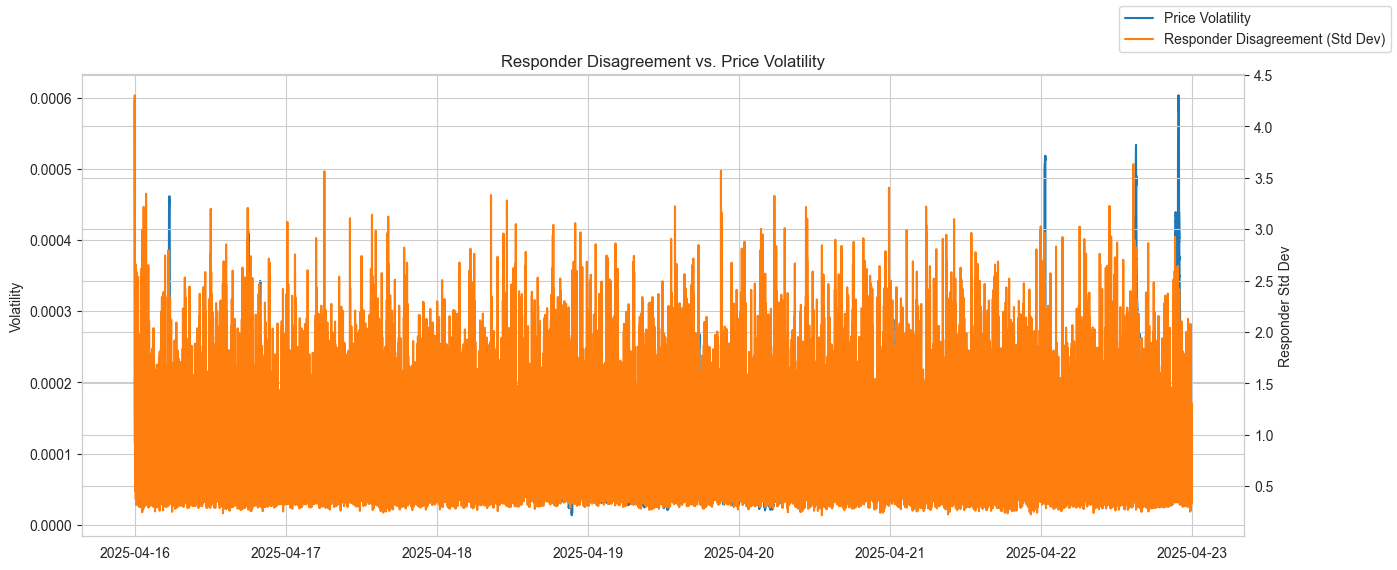

In [216]:
# Get the list of responder columns
responder_cols = df_copy.columns.drop(['mid_prc', 'returns', 'volatility'], errors='ignore')

# Create aggregate features
df_eda = df_copy.copy()
df_eda['responder_mean'] = df_eda[responder_cols].mean(axis=1)
df_eda['responder_std'] = df_eda[responder_cols].std(axis=1)

# --- Plot responder disagreement vs. price volatility ---
# Ensure you have the 'volatility' column from our previous analysis
if 'volatility' not in df_eda.columns:
    df_eda['returns'] = df_eda['mid_prc'].pct_change()
    df_eda['volatility'] = df_eda['returns'].rolling(window=10*60).std()

# Plot on a dual-axis chart to compare
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.set_title('Responder Disagreement vs. Price Volatility')
ax1.plot(df_eda.index, df_eda['volatility'], color='C0', label='Price Volatility')
ax1.set_ylabel('Volatility')
ax2 = ax1.twinx()
ax2.plot(df_eda.index, df_eda['responder_std'], color='C1', label='Responder Disagreement (Std Dev)')
ax2.set_ylabel('Responder Std Dev')
fig.legend()
plt.show()

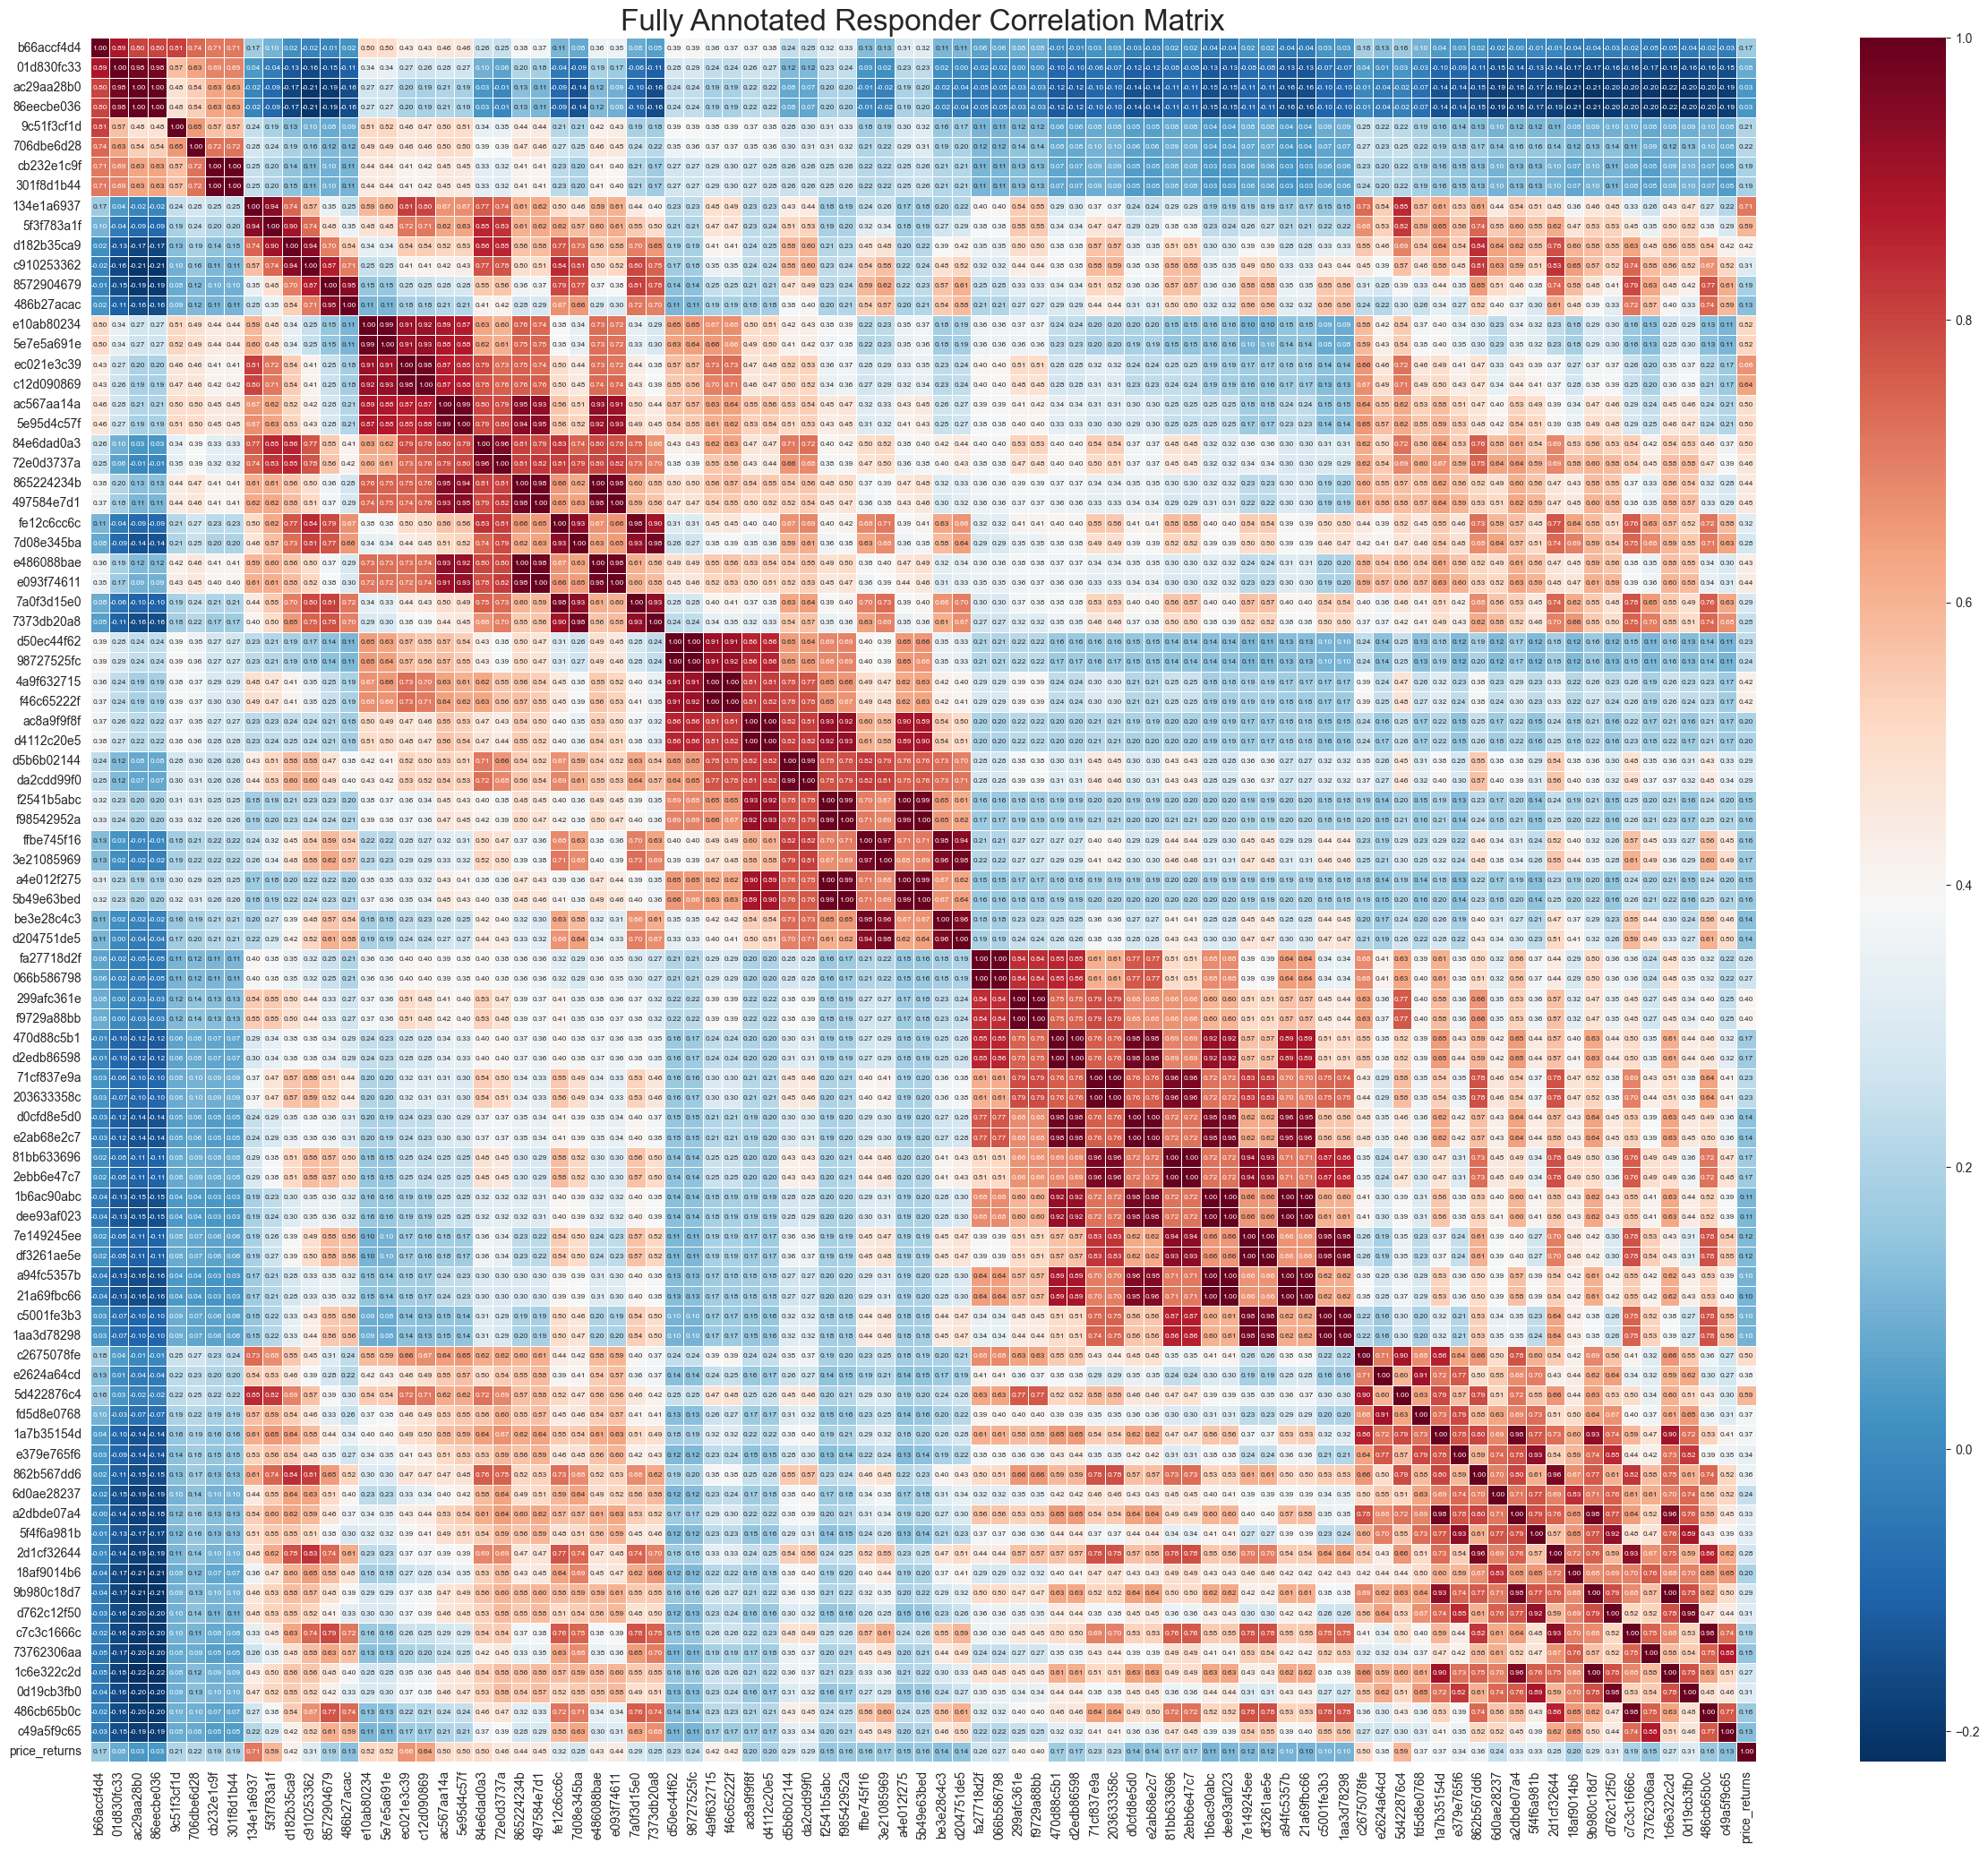

In [217]:
# Calculate the correlation matrix between all responders
responder_corr = df_eda[responder_cols].corr()

fig, ax = plt.subplots(figsize=(30, 25))

sns.heatmap(
    responder_corr,
    annot=True,                 # This is the key change: display the numbers
    fmt=".2f",                  # Format to 2 decimal places
    cmap='RdBu_r',                # Use a diverging colormap for positive/negative
    annot_kws={"size": 6},      # Use a very small font size for the numbers
    linewidths=.5,
    ax=ax
)

ax.set_title('Fully Annotated Responder Correlation Matrix', fontsize=24)
plt.show()

In [218]:
# Example: Let's say you identified two clusters from your heatmap
# (Replace with the actual column names you identify)

cluster_A_responders = ['e10ab80234', '5e7e5a691e', 'ec021e3c39', 'c12d090869', 'ac567aa14a', '5e95d4c57f',
                        '84e6dad0a3', '72e0d3737a', '865224234b', '497584e7d1', 'fe12c6cc6c', '7d08e345ba',
                        'e486088bae', 'e093f74611', '7a0f3d15e0', '7373db20a8'] # A positively correlated group
cluster_B_responders = ['d50ec44f62', '98727525fc', '4a9f632715', 'f46c65222f', 'ac8a9f9f8f', 'd4112c20e5',
                        'd5b6b02144', 'da2cdd99f0', 'f2541b5abc', 'f98542952a', 'ffbe745f16', '3e21085969',
                        'a4e012f275', '5b49e63bed', 'be3e28c4c3', 'd204751de5'] # Another correlated group
cluster_C_responders = ['fa27718d2f', '066b586798', '299afc361e', 'f9729a88bb', '470d88c5b1', 'd2edb86598',
                        '71cf837e9a', '203633358c', 'd0cfd8e5d0', 'e2ab68e2c7', '81bb633696', '2ebb6e47c7',
                        '1b6ac90abc', 'dee93af023', '7e149245ee', 'df3261ae5e', 'a94fc5357b', '21a69fbc66',
                        'c5001fe3b3', '1aa3d78298']

# Create new features by averaging the values in each cluster
df_copy['cluster_A_signal'] = df_copy[cluster_A_responders].mean(axis=1)
df_copy['cluster_B_signal'] = df_copy[cluster_B_responders].mean(axis=1)
df_copy['cluster_C_signal'] = df_copy[cluster_C_responders].mean(axis=1)

print("Created new composite features:")
print(df_copy[['cluster_A_signal', 'cluster_B_signal', 'cluster_C_signal']].head())

Created new composite features:
                     cluster_A_signal  cluster_B_signal  cluster_C_signal
timestamp                                                                
2025-04-16 00:00:05          5.000000          5.000000         -5.000000
2025-04-16 00:00:06          0.638066         -1.098204         -1.919456
2025-04-16 00:00:07          0.946871          0.857852         -1.753716
2025-04-16 00:00:08         -5.000000         -0.908650         -2.025688
2025-04-16 00:00:09         -4.984200         -2.074759         -1.841629


In [219]:
# Ensure you have the 'price_returns' column
if 'price_returns' not in df_copy.columns:
    df_copy['price_returns'] = df_copy['mid_prc'].pct_change()

# Check the correlation of the new cluster signals with returns
corr_A = df_copy['cluster_A_signal'].corr(df_copy['price_returns'])
corr_B = df_copy['cluster_B_signal'].corr(df_copy['price_returns'])
corr_C = df_copy['cluster_C_signal'].corr(df_copy['price_returns'])

print(f"\nCorrelation of Cluster A Signal with Price Returns: {corr_A:.4f}")
print(f"Correlation of Cluster B Signal with Price Returns: {corr_B:.4f}")
print(f"Correlation of Cluster C Signal with Price Returns: {corr_C:.4f}")


Correlation of Cluster A Signal with Price Returns: 0.5267
Correlation of Cluster B Signal with Price Returns: 0.2584
Correlation of Cluster C Signal with Price Returns: 0.2040


In [220]:


# --- 1. Prepare Your Final Features ---
# (You would have already created these columns on df_copy)
# df_copy['cluster_A_signal'] = ...
# df_copy['cluster_B_signal'] = ...
# df_copy['cluster_C_signal'] = ...

# Define your predictive features (X) and the target (y)
features = ['cluster_A_signal', 'cluster_B_signal', 'cluster_C_signal']
target = 'price_returns'

# Create the final modeling DataFrame and remove any missing values
df_model = df_copy[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

# --- 2. Split the Data Chronologically ---
# We use shuffle=False for time-series data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# --- 3. Train the Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- 4. Evaluate the Model on the Test Set ---
r_squared = model.score(X_test, y_test)

# --- 5. Print the Final Results ---
print("--- Final Multi-Feature Model Evaluation ---")
print(f"Features Used: {features}")
print(f"Out-of-Sample R-squared: {r_squared:.4f}\n")

# See how the model weights each feature
feature_weights = pd.Series(model.coef_, index=features)
print("--- Model Feature Weights ---")
print(feature_weights)

--- Final Multi-Feature Model Evaluation ---
Features Used: ['cluster_A_signal', 'cluster_B_signal', 'cluster_C_signal']
Out-of-Sample R-squared: 0.2652

--- Model Feature Weights ---
cluster_A_signal    0.000064
cluster_B_signal   -0.000014
cluster_C_signal   -0.000004
dtype: float32


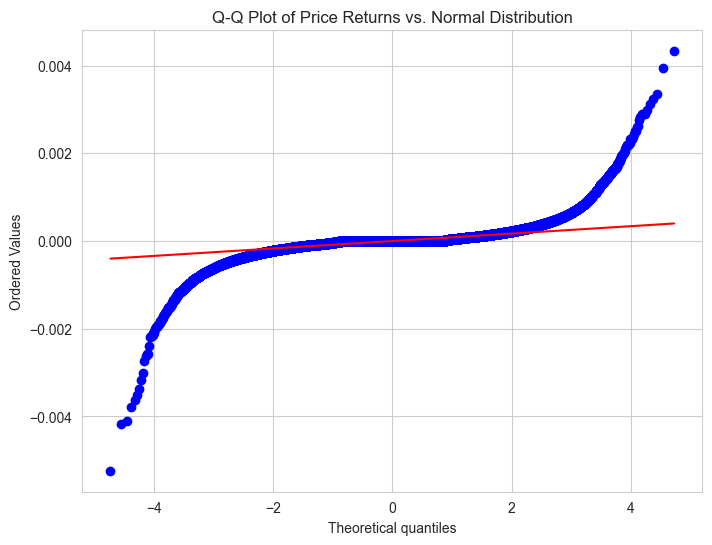

Kurtosis of price returns: 87.51


In [221]:
# --- Q-Q Plot for Price Returns ---
returns_sample = df_copy['price_returns'].dropna()

plt.figure(figsize=(8, 6))
stats.probplot(returns_sample, dist="norm", plot=plt)
plt.title('Q-Q Plot of Price Returns vs. Normal Distribution')
plt.grid(True)
plt.show()

# Calculate Kurtosis (a measure of "tailedness")
kurt = returns_sample.kurtosis()
print(f"Kurtosis of price returns: {kurt:.2f}")

<Figure size 1200x500 with 0 Axes>

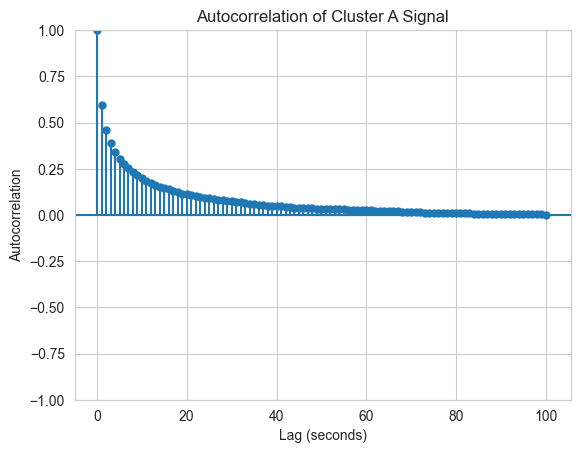

In [222]:
# --- Autocorrelation of the Best Cluster Signal ---
signal_to_check = df_copy['cluster_A_signal'].dropna()

plt.figure(figsize=(12, 5))
plot_acf(signal_to_check, lags=100) # Check up to 100 seconds of memory
plt.title('Autocorrelation of Cluster A Signal')
plt.xlabel('Lag (seconds)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


--- Signal Correlation by Hour of Day ---
hour
0     0.511857
1     0.560832
2     0.571754
3     0.584086
4     0.561633
5     0.476347
6     0.584984
7     0.528216
8     0.591878
9     0.574117
10    0.531003
11    0.576919
12    0.563861
13    0.583463
14    0.537042
15    0.520481
16    0.594691
17    0.556430
18    0.568651
19    0.534807
20    0.581384
21    0.430908
22    0.543662
23    0.531928
Name: (cluster_A_signal, price_returns), dtype: float64


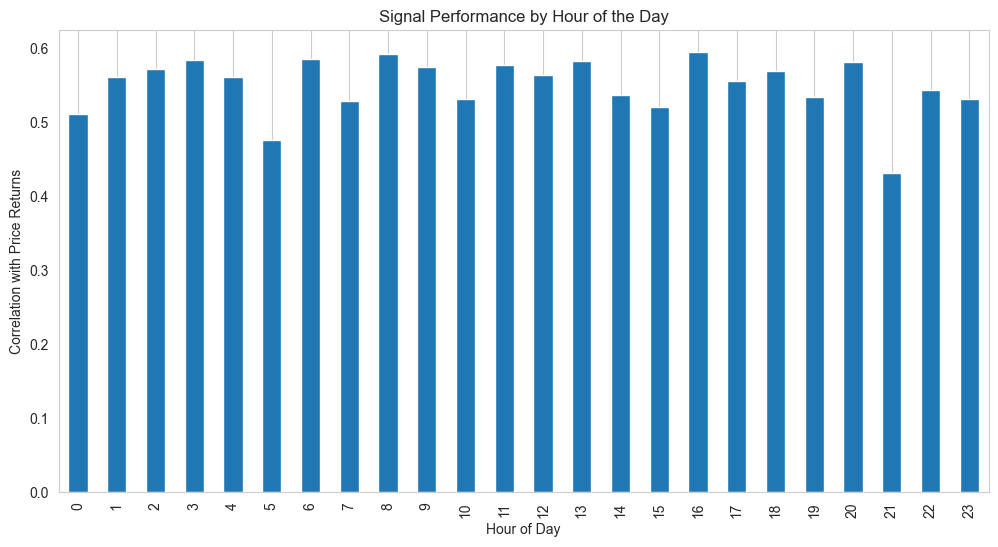

In [223]:
# --- Ensure required columns exist ---
df_intraday = df_copy[['cluster_A_signal', 'price_returns']].dropna().copy()

# --- 1. Create an 'hour' feature ---
df_intraday['hour'] = df_intraday.index.hour

# --- 2. Calculate Correlation for each Hour ---
hourly_corr = df_intraday.groupby('hour')[['cluster_A_signal', 'price_returns']].corr().unstack().iloc[:,1]

print("\n--- Signal Correlation by Hour of Day ---")
print(hourly_corr)

# --- 3. Plot the results ---
hourly_corr.plot(kind='bar', figsize=(12, 6))
plt.title('Signal Performance by Hour of the Day')
plt.ylabel('Correlation with Price Returns')
plt.xlabel('Hour of Day')
plt.grid(axis='y')
plt.show()